# ARHI x sex interaction analysis

Use sex as the interactive covariate. Exclude sex in the covariates.

## Regenie interaction (ARHI x sex)

In [3]:
# Common variables Columbia's cluster
UKBB_PATH=$HOME/UKBiobank
UKBB_yale=$HOME/UKBiobank_Yale_transfer
USER_PATH=$HOME/working
container_lmm=$HOME/containers/lmm.sif
container_marp=$HOME/containers/marp.sif
container_annovar=$HOME/containers/gatk4-annovar.sif
hearing_pheno_path=$UKBB_PATH/phenotype_files/hearing_impairment
tpl_file=$USER_PATH/bioworkflows/admin/csg.yml
formatFile_fastgwa=$USER_PATH/UKBB_GWAS_dev/data/fastGWA_template.yml
formatFile_bolt=$USER_PATH/UKBB_GWAS_dev/data/boltlmm_template.yml
formatFile_saige=$USER_PATH/UKBB_GWAS_dev/data/saige_template.yml
formatFile_regenie=$USER_PATH/UKBB_GWAS_dev/data/regenie_template.yml
# Workflows
lmm_sos=$USER_PATH/bioworkflows/GWAS/LMM.ipynb
anno_sos=$USER_PATH/bioworkflows/variant-annotation/annovar.ipynb
clumping_sos=$USER_PATH/bioworkflows/GWAS/LD_Clumping.ipynb
extract_sos=$USER_PATH/bioworkflows/GWAS/Region_Extraction.ipynb
snptogene_sos=$USER_PATH/UKBB_GWAS_dev/workflow/snptogene.ipynb

# LMM directories for array data data
lmm_imp_dir_fastgwa=$UKBB_PATH/results/FastGWA_results/results_array_data
lmm_imp_dir_bolt=$UKBB_PATH/results/BOLTLMM_results/results_array_data
lmm_imp_dir_saige=$UKBB_PATH/results/SAIGE_results/results_array_data
lmm_imp_dir_regenie=$UKBB_PATH/results/REGENIE_results/results_array_data

# LMM directories for exome data
lmm_exome_dir_fastgwa=$UKBB_PATH/results/FastGWA_results/results_array_data
lmm_exome_dir_bolt=$UKBB_PATH/results/BOLTLMM_results/results_array_data
lmm_exome_dir_saige=$UKBB_PATH/results/SAIGE_results/results_array_data
lmm_exome_dir_regenie=$UKBB_PATH/results/REGENIE_results/results_array_data
### Specific to REGENIE
bsize=1000
trait=bt
bgenMinMAF=0.001
bgenMinINFO=0.8
minMAC=4
maf_filter=0.01
geno_filter=0.01
hwe_filter=0
mind_filter=0.1
reverse_log_p=True
numThreads=2

In [4]:
# 200k exome
# f3393
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393
lmm_sbatch_regenie=$lmm_dir_regenie/f3393_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2.tsv
phenoCol=f3393
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile=`echo /home/gl2776/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c{1..22}.merged.filtered.bed`
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 

INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/f3393_sex_interaction-regenie_2022-05-17.sbatch
INFO: Workflow csg (ID=wd7f9119b68345bce) is executed successfully with 1 completed step.


In [5]:
# f2247
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247
lmm_sbatch_regenie=$lmm_dir_regenie/f2247_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_difficulty_f2247_expandedwhite_45502cases_96601ctrl_PC1_2.tsv
phenoCol=f2247
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile=`echo /home/gl2776/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c{1..22}.merged.filtered.bed`
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 

# f2257
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2257
lmm_sbatch_regenie=$lmm_dir_regenie/f2257_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_noise_f2257_expandedwhite_65660cases_96601ctrl_PC1_2.tsv
phenoCol=f2257
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile=`echo /home/gl2776/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c{1..22}.merged.filtered.bed`
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 


# f2247_f2257
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247_f2257
lmm_sbatch_regenie=$lmm_dir_regenie/f2247_f2257_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Combined_f2247_f2257_expandedwhite_38410cases_96601ctrl_PC1_2.tsv
phenoCol=f2247_f2257
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile=`echo /home/gl2776/UKBiobank/data/exome_files/project_VCF/072721_run/plink/ukb23156_c{1..22}.merged.filtered.bed`
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 

INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247/f2247_sex_interaction-regenie_2022-05-17.sbatch
INFO: Workflow csg (ID=w9fcc09c866ca20d0) is executed successfully with 1 completed step.
INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2257/f2257_sex_interaction-regenie_2022-05-17.sbatch
INFO: Workflow csg (ID=wea5aaf6103093b94) is executed successfully with 1 completed step.
INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247_f2257/f2247_f2257_sex_interaction-regenie_2022-05-17.sbatch
INFO: Workflow csg (ID=we0a6c07501e22a7e) i

## Results analysis with discovered variants

The following variants are of interest
```
chr1:46001049:T:C
chr1:46021880:G:A
chr1:46027788:T:G
chr1:46132597:C:A
chr5:272741:A:G
chr5:272748:G:C
chr5:272755:A:G
chr5:73776529:T:C
chr5:73780632:G:A
chr5:73780649:GT:G
chr5:73780686:C:A
chr5:73794436:T:C
chr5:73795301:T:A
chr5:73795403:C:T
chr6:158071628:C:T
chr6:43301291:A:C
chr6:43305866:A:G
chr6:43308652:G:A
chr6:75362956:T:C
chr6:75841299:A:G
chr7:73573024:C:T
chr7:73605645:A:G
chr20:62065259:A:G
chr22:38086345:GTGCGGGAGCGGGACTGGCCATCCCAGTACTCCGAGGGTGCTA:G
chr22:50549676:G:A
```

In [1]:
import pandas as pd
file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/cache/ukb23156_c1.merged.filtered.bed.sex_f3393.regenie.gz"
stat = pd.read_csv(file,header=0,sep=" ")
stat

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
0,1,925862,chr1:925862:G:A,G,A,0.000027,93212,ADD-CONDTL,-1.448210,1.333390,1.179640,0.556848,NaN
1,1,925862,chr1:925862:G:A,G,A,0.000027,93212,ADD-INT_SNP,-7.746010,42.909800,0.032587,0.067148,NaN
2,1,925862,chr1:925862:G:A,G,A,0.000027,93212,ADD-INT_SNPxsex,2.476520,69.468200,0.001271,0.012530,NaN
3,1,925862,chr1:925862:G:A,G,A,0.000027,93212,ADD-INT_2DF,NaN,NaN,0.042282,0.009181,NaN
4,1,925881,chr1:925881:G:A,G,A,0.004690,100210,ADD-CONDTL,-0.209793,0.143623,2.133700,0.841357,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164288,1,248918380,chr1:248918380:T:G,T,G,0.000146,103030,ADD-INT_2DF,NaN,NaN,1.731550,0.376002,NaN
1164289,1,248918390,chr1:248918390:A:G,A,G,0.000029,102992,ADD-CONDTL,-1.052730,2.325280,0.204966,0.186591,NaN
1164290,1,248918390,chr1:248918390:A:G,A,G,0.000029,102992,ADD-INT_SNP,-6.260560,53.837500,0.013522,0.042189,NaN
1164291,1,248918390,chr1:248918390:A:G,A,G,0.000029,102992,ADD-INT_SNPxsex,-1.112130,199.283000,0.000031,0.001938,NaN


In [4]:
snplist = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vairants_of_interest.txt",header=None)[0].to_list()
tmp = stat[stat["ID"].isin(snplist)]
tmp[tmp["TEST"]=="ADD-INT_SNPxsex"]

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
421246,1,46001049,chr1:46001049:T:C,T,C,0.427120,99183,ADD-INT_SNPxsex,0.036216,0.040272,0.808703,0.433558,NaN
421410,1,46021880,chr1:46021880:G:A,G,A,0.434137,101574,ADD-INT_SNPxsex,0.039930,0.039117,1.041960,0.512345,NaN
421659,1,46027788,chr1:46027788:T:G,T,G,0.437853,102966,ADD-INT_SNPxsex,0.031215,0.038690,0.650910,0.376970,NaN
423001,1,46132597,chr1:46132597:C:A,C,A,0.438899,103034,ADD-INT_SNPxsex,0.033714,0.038751,0.756930,0.415340,NaN


In [11]:
snplist = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vairants_of_interest.txt",header=None)[0].to_list()
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f3393.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-INT_SNPxsex"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
result

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
0,1,46001049,chr1:46001049:T:C,T,C,0.42712,99183,ADD-INT_SNPxsex,0.036216,0.040272,0.808703,0.433558,NaN
1,1,46021880,chr1:46021880:G:A,G,A,0.434137,101574,ADD-INT_SNPxsex,0.03993,0.039117,1.04196,0.512345,NaN
2,1,46027788,chr1:46027788:T:G,T,G,0.437853,102966,ADD-INT_SNPxsex,0.031215,0.03869,0.65091,0.37697,NaN
3,1,46132597,chr1:46132597:C:A,C,A,0.438899,103034,ADD-INT_SNPxsex,0.033714,0.038751,0.75693,0.41534,NaN
4,5,272741,chr5:272741:A:G,A,G,0.000539,103025,ADD-INT_SNPxsex,0.216107,0.491409,0.193397,0.180387,NaN
5,5,272748,chr5:272748:G:C,G,C,0.000447,103008,ADD-INT_SNPxsex,-0.38988,0.564171,0.477574,0.310227,NaN
6,5,272755,chr5:272755:A:G,A,G,0.000578,103030,ADD-INT_SNPxsex,0.153732,0.474756,0.104855,0.127215,NaN
7,5,73776529,chr5:73776529:T:C,T,C,0.46584,103031,ADD-INT_SNPxsex,0.085258,0.0385,4.90034,1.57103,NaN
8,5,73780632,chr5:73780632:G:A,G,A,0.461324,102208,ADD-INT_SNPxsex,0.079997,0.038733,4.26267,1.4094,NaN
9,5,73780649,chr5:73780649:GT:G,GT,G,0.469417,101396,ADD-INT_SNPxsex,0.08182,0.038903,4.42026,1.44959,NaN


In [28]:
snplist = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vairants_of_interest.txt",header=None)[0].to_list()
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f3393.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-INT_SNPxsex"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
result[["CHROM","GENPOS","ID","TEST","LOG10P"]]

,CHROM,GENPOS,ID,TEST,LOG10P
0,1,46001049,chr1:46001049:T:C,ADD-INT_SNPxsex,0.433558
1,1,46021880,chr1:46021880:G:A,ADD-INT_SNPxsex,0.512345
2,1,46027788,chr1:46027788:T:G,ADD-INT_SNPxsex,0.37697
3,1,46132597,chr1:46132597:C:A,ADD-INT_SNPxsex,0.41534
4,5,272741,chr5:272741:A:G,ADD-INT_SNPxsex,0.180387
5,5,272748,chr5:272748:G:C,ADD-INT_SNPxsex,0.310227
6,5,272755,chr5:272755:A:G,ADD-INT_SNPxsex,0.127215
7,5,73776529,chr5:73776529:T:C,ADD-INT_SNPxsex,1.57103
8,5,73780632,chr5:73780632:G:A,ADD-INT_SNPxsex,1.4094
9,5,73780649,chr5:73780649:GT:G,ADD-INT_SNPxsex,1.44959


In [40]:
snplist = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vairants_of_interest.txt",header=None)[0].to_list()
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f3393.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    #tmp = tmp[tmp["TEST"]=="ADD-INT_SNPxsex"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
result[result["TEST"]=="ADD-CONDTL"][["CHROM","GENPOS","ID","TEST","LOG10P"]]

,CHROM,GENPOS,ID,TEST,LOG10P
0,1,46001049,chr1:46001049:T:C,ADD-CONDTL,1.48726
4,1,46021880,chr1:46021880:G:A,ADD-CONDTL,1.56105
8,1,46027788,chr1:46027788:T:G,ADD-CONDTL,1.36076
12,1,46132597,chr1:46132597:C:A,ADD-CONDTL,1.36003
16,5,272741,chr5:272741:A:G,ADD-CONDTL,10.1892
20,5,272748,chr5:272748:G:C,ADD-CONDTL,7.68709
24,5,272755,chr5:272755:A:G,ADD-CONDTL,9.95175
28,5,73776529,chr5:73776529:T:C,ADD-CONDTL,7.7842
32,5,73780632,chr5:73780632:G:A,ADD-CONDTL,7.26544
36,5,73780649,chr5:73780649:GT:G,ADD-CONDTL,7.83956


In [34]:
result[result["TEST"]=="ADD-CONDTL"][["CHROM","GENPOS","ID","TEST","LOG10P"]].shape

(25, 5)

In [41]:
col = result[result["TEST"]=="ADD-CONDTL"][["CHROM","GENPOS","ID"]]

In [42]:
snplist = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vairants_of_interest.txt",header=None)[0].to_list()
# f3393
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f3393.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-INT_SNPxsex"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col = col.rename(columns={"LOG10P":"f3393"})
# f2247
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f2247.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-INT_SNPxsex"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col= col.rename(columns={"LOG10P":"f2247"})
# f2257
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2257/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f2257.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-INT_SNPxsex"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col= col.rename(columns={"LOG10P":"f2257"})
# f2247_f2257
result = pd.DataFrame(columns=stat.columns)
for i in [1,5,6,7,20,22]:
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247_f2257/cache/ukb23156_c"+str(i)+".merged.filtered.bed.sex_f2247_f2257.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    tmp = stat[stat["ID"].isin(snplist)]
    tmp = tmp[tmp["TEST"]=="ADD-INT_SNPxsex"]
    result = pd.concat([result,tmp], axis=0,ignore_index=True)
col = col.merge(result[["ID","LOG10P"]],how="left",left_on="ID",right_on="ID")
col= col.rename(columns={"LOG10P":"f2247_f2257"})
col.iloc[:,3:] = 10**(-col.iloc[:,3:])
col

,CHROM,GENPOS,ID,f3393,f2247,f2257,f2247_f2257
0,1,46001049,chr1:46001049:T:C,0.368504,0.977637,0.425022,0.97753
1,1,46021880,chr1:46021880:G:A,0.307365,0.727522,0.238529,0.730976
2,1,46027788,chr1:46027788:T:G,0.419788,0.937475,0.387529,0.925932
3,1,46132597,chr1:46132597:C:A,0.384291,0.82291,0.380452,0.886132
4,5,272741,chr5:272741:A:G,0.660105,0.153036,0.249944,0.118207
5,5,272748,chr5:272748:G:C,0.489523,0.142472,0.213779,0.137861
6,5,272755,chr5:272755:A:G,0.746079,0.09104,0.151607,0.06307
7,5,73776529,chr5:73776529:T:C,0.026852,0.14838,0.359496,0.056573
8,5,73780632,chr5:73780632:G:A,0.038958,0.273677,0.516853,0.108467
9,5,73780649,chr5:73780649:GT:G,0.035515,0.191505,0.489894,0.052426


In [43]:
0.05/25

0.002

In [44]:
col.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/vof.inter.sex.p.csv",index=False)

## Burden test (discovered genes x sex)

In [18]:
# Common variables Columbia's cluster
UKBB_PATH=$HOME/UKBiobank
UKBB_yale=$HOME/UKBiobank_Yale_transfer
USER_PATH=$HOME/working
container_lmm=$HOME/containers/lmm.sif
container_marp=$HOME/containers/marp.sif
container_annovar=$HOME/containers/gatk4-annovar.sif
hearing_pheno_path=$UKBB_PATH/phenotype_files/hearing_impairment
tpl_file=$USER_PATH/bioworkflows/admin/csg.yml
formatFile_fastgwa=$USER_PATH/UKBB_GWAS_dev/data/fastGWA_template.yml
formatFile_bolt=$USER_PATH/UKBB_GWAS_dev/data/boltlmm_template.yml
formatFile_saige=$USER_PATH/UKBB_GWAS_dev/data/saige_template.yml
formatFile_regenie=$USER_PATH/UKBB_GWAS_dev/data/regenie_template.yml
# Workflows
lmm_sos=$USER_PATH/bioworkflows/GWAS/LMM.ipynb
anno_sos=$USER_PATH/bioworkflows/variant-annotation/annovar.ipynb
clumping_sos=$USER_PATH/bioworkflows/GWAS/LD_Clumping.ipynb
extract_sos=$USER_PATH/bioworkflows/GWAS/Region_Extraction.ipynb
snptogene_sos=$USER_PATH/UKBB_GWAS_dev/workflow/snptogene.ipynb
### Specific to REGENIE
bsize=1000
trait=bt
bgenMinMAF=0.001
bgenMinINFO=0.8
minMAC=4
maf_filter=0
geno_filter=0
hwe_filter=0
mind_filter=0
reverse_log_p=True
numThreads=2

In [19]:
# 200k exome
# f3393
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f3393
lmm_sbatch_regenie=$lmm_dir_regenie/f3393_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl_PC1_2.tsv
phenoCol=f3393
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile="~/project/guangyou/epistasis/chr1/ukb23155_c1_b0_v1.filtered.gene.bed"
for i in {2..22}
do
genoFile=`echo "${genoFile} ~/project/guangyou/epistasis/chr${i}/ukb23155_c${i}_b0_v1.filtered.gene.bed"`
done
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 

# f2247
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247
lmm_sbatch_regenie=$lmm_dir_regenie/f2247_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_difficulty_f2247_expandedwhite_45502cases_96601ctrl_PC1_2.tsv
phenoCol=f2247
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile="~/project/guangyou/epistasis/chr1/ukb23155_c1_b0_v1.filtered.gene.bed"
for i in {2..22}
do
genoFile=`echo "${genoFile} ~/project/guangyou/epistasis/chr${i}/ukb23155_c${i}_b0_v1.filtered.gene.bed"`
done
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 

# f2257
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2257
lmm_sbatch_regenie=$lmm_dir_regenie/f2257_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_noise_f2257_expandedwhite_65660cases_96601ctrl_PC1_2.tsv
phenoCol=f2257
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile="~/project/guangyou/epistasis/chr1/ukb23155_c1_b0_v1.filtered.gene.bed"
for i in {2..22}
do
genoFile=`echo "${genoFile} ~/project/guangyou/epistasis/chr${i}/ukb23155_c${i}_b0_v1.filtered.gene.bed"`
done
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 


# f2247_f2257
lmm_dir_regenie=/home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247_f2257
lmm_sbatch_regenie=$lmm_dir_regenie/f2247_f2257_sex_interaction-regenie_$(date +"%Y-%m-%d").sbatch
phenoFile=/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Combined_f2247_f2257_expandedwhite_38410cases_96601ctrl_PC1_2.tsv
phenoCol=f2247_f2257
covarCol=age
qCovarCol="PC1 PC2"
#Use the original bed files that passed QC using Megan's parameters geno=0.01, mind=0.1, maf=0.01, hwe=5e-08
bfile=/home/gl2776/UKBiobank/genotype_files_processed/090221_sample_variant_qc_final_callrate90/cache/UKB_genotypedatadownloaded083019.090221_sample_variant_qc_final_callrate90.filtered.extracted.bed
# Use the gene bfile here for the association
genoFile="~/project/guangyou/epistasis/chr1/ukb23155_c1_b0_v1.filtered.gene.bed"
for i in {2..22}
do
genoFile=`echo "${genoFile} ~/project/guangyou/epistasis/chr${i}/ukb23155_c${i}_b0_v1.filtered.gene.bed"`
done
## After doing the annotation you can create the annotatted manhatan plot
lmm_job_size=20
regenie_sos=~/working/interaction/newv/Regenie_interaction_GxE.ipynb
regenieFile=/mnt/mfs/statgen/guangyou/containers/regenie.v.2.3
lowmem_dir=$lmm_dir_regenie/scratch60/
covariates=sex
# If --annotate then it will add the label to the plot otherwise --no-annotate

lmm_args="""regenie
    --cwd $lmm_dir_regenie 
    --bfile $bfile 
    --genoFile $genoFile
    --phenoFile $phenoFile 
    --formatFile $formatFile_regenie 
    --regenieFile $regenieFile
    --sampleFile $sampleFile
    --phenoCol $phenoCol
    --covarCol $covarCol  
    --qCovarCol $qCovarCol
    --bsize $bsize
    --lowmem_dir $lowmem_dir
    --trait $trait
    --covariates $covariates
    --bgenMinMAF $bgenMinMAF 
    --bgenMinINFO $bgenMinINFO
    --maf_filter $maf_filter
    --geno_filter $geno_filter
    --hwe_filter $hwe_filter
    --mind_filter $mind_filter
    --minMAC $minMAC
    --job_size $lmm_job_size
    --container_lmm $container_lmm
    --container_marp $container_marp
"""

sos run ~/working/UKBB_GWAS_dev/admin/Get_Job_Script.ipynb csg\
    --template-file $tpl_file \
    --workflow-file $regenie_sos \
    --to-script $lmm_sbatch_regenie \
    --args "$lmm_args" 

INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f3393/f3393_sex_interaction-regenie_2022-05-19.sbatch
INFO: Workflow csg (ID=we6c0c1bcf4fa40bd) is executed successfully with 1 completed step.
INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247/f2247_sex_interaction-regenie_2022-05-19.sbatch
INFO: Workflow csg (ID=wa9b65ad7b6d10856) is executed successfully with 1 completed step.
INFO: Running csg: Configuration for Columbia csg partition cluster
INFO: csg is completed.
INFO: csg output:   /home/gl2776/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2257/f2257_sex_interaction-regenie_2022-05-19.sbatch
INFO: Workflow csg (ID=wf3c4d04be1

In [49]:
from=~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f3393/
to=~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f3393/
cp -r $from/090321* $to/
cp -r $from/cache/UKB_geno* $to/cache/
from=~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247/
to=~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247/
cp -r $from/090321* $to/
cp -r $from/cache/UKB_geno* $to/cache/
from=~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2257/
to=~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2257/
cp -r $from/090321* $to/
cp -r $from/cache/UKB_geno* $to/cache/
from=~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/f2247_f2257/
to=~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247_f2257/
cp -r $from/090321* $to/
cp -r $from/cache/UKB_geno* $to/cache/

## Results analysis

In [20]:
import pandas as pd
file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f3393/cache/ukb23155_c1_b0_v1.filtered.gene.sex_f3393.regenie.gz"
stat = pd.read_csv(file,header=0,sep=" ")
stat

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
0,1,925946,SAMD11,G,A,0.217199,103037,ADD-CONDTL,-0.007746,0.020108,0.148400,0.154859,NaN
1,1,925946,SAMD11,G,A,0.217199,103037,ADD-INT_SNP,-0.004937,0.027366,0.032543,0.067099,NaN
2,1,925946,SAMD11,G,A,0.217199,103037,ADD-INT_SNPxsex,-0.006112,0.040326,0.022974,0.055752,NaN
3,1,925946,SAMD11,G,A,0.217199,103037,ADD-INT_2DF,NaN,NaN,0.171139,0.037162,NaN
4,1,944696,NOC2L,G,A,0.176087,103037,ADD-CONDTL,-0.008187,0.022741,0.129608,0.143369,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7807,1,248850215,ZNF692,G,A,0.405510,103037,ADD-INT_2DF,NaN,NaN,6.564580,1.425480,NaN
7808,1,248913867,PGBD2,G,A,0.014708,103037,ADD-CONDTL,0.209944,0.073654,7.742910,2.268220,NaN
7809,1,248913867,PGBD2,G,A,0.014708,103037,ADD-INT_SNP,0.272935,0.099254,7.561840,2.224630,NaN
7810,1,248913867,PGBD2,G,A,0.014708,103037,ADD-INT_SNPxsex,-0.140874,0.149554,0.887290,0.460657,NaN


In [28]:
# Top interaction gene*sex
# f3393
result = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f3393/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_f3393.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    result = pd.concat([result,stat[stat["TEST"]=="ADD-INT_SNPxsex"]], axis=0,ignore_index=True)
result = result.sort_values("LOG10P",ascending=False)
result.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f3393/inter.ranked.txt",index=False)
result

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
13793,16,53370160,LOC643802,G,A,0.010564,103037,ADD-INT_SNPxsex,-0.650155,0.177293,14.5386,3.86227,NaN
4404,4,56648731,HOPX,G,A,0.015645,103037,ADD-INT_SNPxsex,-0.592758,0.16224,13.9805,3.73349,NaN
4288,4,17811102,NCAPG,G,A,0.013156,103037,ADD-INT_SNPxsex,-0.640225,0.175958,13.9308,3.72202,NaN
17463,21,32793770,C21orf62,G,A,0.003528,103037,ADD-INT_SNPxsex,1.72614,0.535129,13.1456,3.54031,NaN
14099,16,88876980,CBFA2T3,G,A,0.003135,103037,ADD-INT_SNPxsex,1.34722,0.394879,13.0363,3.51498,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10979,12,6970928,EMG1,G,A,0.000068,103037,ADD-INT_SNPxsex,-0.027337,71.8084,0.0,0.000132,NaN
3153,3,4516495,ITPR1,G,A,0.017935,103037,ADD-INT_SNPxsex,0.000056,0.148714,0.0,0.00013,NaN
8095,8,132129267,KCNQ3,G,A,0.000087,103037,ADD-INT_SNPxsex,0.010534,63.4141,0.0,0.000058,NaN
2845,2,199933075,TYW5,G,A,0.002504,103037,ADD-INT_SNPxsex,-0.000048,0.394877,0.0,0.000042,NaN


In [29]:
# f2247
result = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_f2247.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    result = pd.concat([result,stat[stat["TEST"]=="ADD-INT_SNPxsex"]], axis=0,ignore_index=True)
result = result.sort_values("LOG10P",ascending=False)
result.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247/inter.ranked.txt",index=False)
result

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
5083,5,69282742,CCDC125,G,A,0.006312,142103,ADD-INT_SNPxsex,-0.396516,0.106279,14.1317,3.76842,NaN
10652,11,105099363,CARD17,G,A,0.014159,142103,ADD-INT_SNPxsex,0.250437,0.069319,13.0208,3.51137,NaN
2317,2,73385950,ALMS1,G,A,0.033979,142103,ADD-INT_SNPxsex,-0.131669,0.036876,12.8247,3.46587,NaN
9187,10,62813215,EGR2,G,A,0.01824,142103,ADD-INT_SNPxsex,0.219174,0.061787,12.5622,3.40491,NaN
9549,10,116886349,SHTN1,G,A,0.002305,142103,ADD-INT_SNPxsex,0.594391,0.168289,12.4648,3.38226,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7214,7,100803477,EPHB4,G,A,0.001425,142103,ADD-INT_SNPxsex,-0.000177,0.218719,0.000001,0.00028,NaN
13501,16,4505495,HMOX2,G,A,0.028043,142103,ADD-INT_SNPxsex,-0.000029,0.050645,0.0,0.000197,NaN
11619,12,98515872,TMPO,G,A,0.000764,142103,ADD-INT_SNPxsex,-0.000096,0.304366,0.0,0.000109,NaN
16206,19,36922777,ZNF568,G,A,0.003779,142103,ADD-INT_SNPxsex,0.000028,0.135691,0.0,0.000071,NaN


In [31]:
# f2257
result = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2257/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_f2257.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    result = pd.concat([result,stat[stat["TEST"]=="ADD-INT_SNPxsex"]], axis=0,ignore_index=True)
result = result.sort_values("LOG10P",ascending=False)
result.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2257/inter.ranked.txt",index=False)
result

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
9549,10,116886349,SHTN1,G,A,0.002308,162261,ADD-INT_SNPxsex,0.605687,0.150314,16.2491,4.25543,NaN
2944,2,218264538,AAMP,G,A,0.005691,162261,ADD-INT_SNPxsex,-0.393056,0.098427,16.1485,4.23237,NaN
2621,2,135788340,LCT,G,A,0.000968,162261,ADD-INT_SNPxsex,-0.95021,0.246028,15.7579,4.14276,NaN
11749,12,113392949,SDS,G,A,0.009152,162261,ADD-INT_SNPxsex,-0.273793,0.069796,15.5732,4.10034,NaN
10721,11,115176487,CADM1,G,A,0.008933,162261,ADD-INT_SNPxsex,-0.296715,0.078207,14.5211,3.85825,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8657,9,114323138,ORM1,G,A,0.004104,162261,ADD-INT_SNPxsex,0.000055,0.113752,0.0,0.000168,NaN
8084,8,125102340,NSMCE2,G,A,0.002259,162261,ADD-INT_SNPxsex,-0.000074,0.155697,0.0,0.000164,NaN
3662,3,101228798,IMPG2,G,A,0.033249,162261,ADD-INT_SNPxsex,0.00001,0.039662,0.0,0.000089,NaN
12940,15,43805107,MFAP1,G,A,0.010101,162261,ADD-INT_SNPxsex,0.000005,0.073144,0.0,0.000024,NaN


In [32]:
# f2247_f2257
result = pd.DataFrame(columns=stat.columns)
for i in range(1,23):
    file = "~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247_f2257/cache/ukb23155_c"+str(i)+"_b0_v1.filtered.gene.sex_f2247_f2257.regenie.gz"
    stat = pd.read_csv(file,header=0,sep=" ")
    result = pd.concat([result,stat[stat["TEST"]=="ADD-INT_SNPxsex"]], axis=0,ignore_index=True)
result = result.sort_values("LOG10P",ascending=False)
result.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/burden/f2247_f2257/inter.ranked.txt",index=False)
result

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
2621,2,135788340,LCT,G,A,0.001026,135011,ADD-INT_SNPxsex,-1.03814,0.283823,14.3825,3.82629,NaN
10652,11,105099363,CARD17,G,A,0.014165,135011,ADD-INT_SNPxsex,0.276932,0.073268,14.244,3.79433,NaN
4289,4,17811102,NCAPG,G,A,0.013017,135011,ADD-INT_SNPxsex,-0.288732,0.07905,13.482,3.61824,NaN
2891,2,206281860,ZDBF2,G,A,0.009799,135011,ADD-INT_SNPxsex,-0.328418,0.090012,13.4772,3.61712,NaN
2944,2,218264538,AAMP,G,A,0.005803,135011,ADD-INT_SNPxsex,-0.4203,0.11571,13.4073,3.60094,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8653,9,113876391,ZNF618,G,A,0.004214,135011,ADD-INT_SNPxsex,0.000051,0.137139,0.0,0.00013,NaN
17030,20,23747816,CST1,G,A,0.006214,135011,ADD-INT_SNPxsex,0.000029,0.111405,0.0,0.000089,NaN
14910,17,50561466,CACNA1G,G,A,0.004403,135011,ADD-INT_SNPxsex,0.000028,0.133455,0.0,0.000072,NaN
13216,15,79961068,BCL2A1,G,A,0.003178,135011,ADD-INT_SNPxsex,0.000028,0.16117,0.0,0.00006,NaN


# Explore the other sex features

## Menopause

search Menopause in UKBiobank 

https://biobank.ndph.ox.ac.uk/showcase/search.cgi?wot=0&srch=menopause&sta0=on&sta1=on&sta2=on&sta3=on&str0=on&str3=on&fit0=on&fit10=on&fit20=on&fit30=on&fvt11=on&fvt21=on&fvt22=on&fvt31=on&fvt41=on&fvt51=on&fvt61=on&fvt101=on&yfirst=2000&ylast=2022

Following fields are related to Women menopause status

```
2724	Had menopause	Female-specific factors  
3581	Age at menopause (last menstrual period)	Female-specific factors  
3710	Length of menstrual cycle	Female-specific factors  
3720	Menstruating today	Female-specific factors  
3700	Time since last menstrual period

6153 medications used for cholesterol, blood pressure, diabetes, or take exogenous hormones
2814 Ever used hormone-replacement therapy (HRT) Female-specific factors
3546 Age last used hormone-replacement therapy (HRT) Female-specific factors
3536 Age started hormone-replacement therapy (HRT)
```

Following fields are related to bald (men)

```
2395	Hair/balding pattern	Male-specific factors 
131778	Date L63 first reported (alopecia areata)	Skin and subcutaneous tissue disorders  
131780	Date L64 first reported (androgenic alopecia)	Skin and subcutaneous tissue disorders  
131784	Date L66 first reported (cicatricial alopecia [scarring hair loss])	Skin and subcutaneous tissue disorders  
131779	Source of report of L63 (alopecia areata)	Skin and subcutaneous tissue disorders  
131781	Source of report of L64 (androgenic alopecia)	Skin and subcutaneous tissue disorders  
131785	Source of report of L66 (cicatricial alopecia [scarring hair loss])	Skin and subcutaneous tissue disorders 
```

In [1]:
## Menopause and bald related variables
import pandas as pd
import numpy as np
with open("/mnt/mfs/statgen/UKBiobank/phenotype_files/HI_UKBB/082321_UKBB_exomes.csv") as fp:
    line = fp.readline() # header
    header = line.split(",")
    
    indiv = ["IID", "FID"]
    icd10_colnames = [col.strip('"') for col in header if "f.41270." in col]
    icd10_ages = [col.strip('"') for col in header if "f.41280." in col]
    icd9_colnames = [col.strip('"') for col in header if "f.41271." in col]
    icd9_ages = [col.strip('"') for col in header if "f.41281." in col]
    f20002_colnames = [col.strip('"') for col in header if "f.20002." in col]
    reported_sex = ["f.31.0.0"]
    genetic_sex = ["f.22001.0.0"]
    ethnicity = [col.strip('"') for col in header if "f.21000." in col]
    hearing_imp_f3393 = [col.strip('"') for col in header if "f.3393." in col]
    hearing_imp_f2247 = [col.strip('"') for col in header if "f.2247." in col]
    hearing_imp_f2257 = [col.strip('"') for col in header if "f.2257." in col]
    tin_cols = [col.strip('"') for col in header if "f.4803." in col]
    ages_f21003_col = [col.strip('"') for col in header if "f.21003." in col]
    ages_f131258_col = [col.strip('"') for col in header if 'f.131258.' in col]
    year_of_birth = [col.strip('"') for col in header if "f.34." in col]
    month_of_birth = [col.strip('"') for col in header if "f.52." in col]
    
    had_menopause = [col.strip('"') for col in header if "f.2724." in col]
    age_menopause = [col.strip('"') for col in header if "f.3581." in col]
    len_menopause = [col.strip('"') for col in header if "f.3710." in col]
    menstruating_date = [col.strip('"') for col in header if "f.3720." in col]
    time_last_menstrual = [col.strip('"') for col in header if "f.3700." in col]
    medications = [col.strip('"') for col in header if "f.6153." in col]
    ever_HRT = [col.strip('"') for col in header if "f.2814." in col]
    age_last_HRT = [col.strip('"') for col in header if "f.3546." in col]
    age_started_HRT = [col.strip('"') for col in header if "f.3536." in col]
    balding_pattern = [col.strip('"') for col in header if "f.2395." in col]
    L63_date = [col.strip('"') for col in header if "f.131778." in col]
    L64_date = [col.strip('"') for col in header if "f.131780." in col]
    L66_date = [col.strip('"') for col in header if "f.131784." in col]
    L63 = [col.strip('"') for col in header if "f.131779." in col]
    L64 = [col.strip('"') for col in header if "f.131781." in col]
    L66 = [col.strip('"') for col in header if "f.131785." in col]
    
combined_cols = indiv + icd10_colnames + icd10_ages + icd9_colnames + icd9_ages \
        + f20002_colnames + ethnicity + reported_sex + genetic_sex + hearing_imp_f3393 \
        + hearing_imp_f2247 + hearing_imp_f2257 + tin_cols + ages_f21003_col + ages_f131258_col \
        + year_of_birth + month_of_birth + had_menopause + age_menopause + len_menopause \
        + menstruating_date + time_last_menstrual + medications + ever_HRT + age_last_HRT \
        + age_started_HRT + balding_pattern + L63_date + L64_date + L66_date + L63 + L64 + L66
df = pd.read_csv("/mnt/mfs/statgen/UKBiobank/phenotype_files/HI_UKBB/082321_UKBB_exomes.csv", quotechar = '"', dtype="string", usecols=combined_cols)
df

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.2247.0.0,f.2247.1.0,f.2247.2.0,f.2247.3.0,f.2257.0.0,...,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131258.0.0,f.131778.0.0,f.131779.0.0,f.131780.0.0,f.131781.0.0,f.131784.0.0,f.131785.0.0
0,1000019,1000019,Female,1960,November,Yes,<NA>,<NA>,<NA>,Yes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1000035,1000035,Male,1944,May,No,<NA>,<NA>,<NA>,Yes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1000078,1000078,Female,1955,June,No,No,No,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1000081,1000081,Male,1942,February,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1000198,1000198,Female,1967,July,Yes,<NA>,<NA>,<NA>,Yes,...,<NA>,<NA>,<NA>,1969-01-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200614,6025295,6025295,Male,1961,April,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200615,6025319,6025319,Female,1953,March,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200616,6025346,6025346,Female,1954,October,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200617,6025363,6025363,Male,1944,April,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [2]:
df[had_menopause]

,f.2724.0.0,f.2724.1.0,f.2724.2.0,f.2724.3.0
0,No,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,Yes,Yes,Yes,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,No,<NA>,<NA>,<NA>
...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>
200615,Yes,<NA>,<NA>,<NA>
200616,Yes,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>


In [18]:
df[had_menopause].stack(dropna=False).value_counts(dropna=False)

<NA>                             672753
Yes                               81267
No                                28032
Not sure - had a hysterectomy     14704
Not sure - other reason            5529
Prefer not to answer                191
dtype: Int64

In [4]:
df[age_menopause]

,f.3581.0.0,f.3581.1.0,f.3581.2.0,f.3581.3.0
0,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,52,52,52,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>
200615,48,<NA>,<NA>,<NA>
200616,49,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>


In [5]:
df[len_menopause]

,f.3710.0.0,f.3710.1.0,f.3710.2.0,f.3710.3.0
0,28,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,28,<NA>,<NA>,<NA>
...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>
200615,<NA>,<NA>,<NA>,<NA>
200616,<NA>,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>


In [6]:
df[menstruating_date]

,f.3720.0.0,f.3720.1.0,f.3720.2.0,f.3720.3.0
0,Yes,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,No,<NA>,<NA>,<NA>
...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>
200615,<NA>,<NA>,<NA>,<NA>
200616,<NA>,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>


In [19]:
df[menstruating_date].stack(dropna=False).value_counts(dropna=False)

<NA>                    768724
No                       28319
Yes                       4827
Do not know                467
Prefer not to answer       139
dtype: Int64

In [7]:
df[time_last_menstrual]

,f.3700.0.0,f.3700.1.0,f.3700.2.0,f.3700.3.0
0,4,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,22,<NA>,<NA>,<NA>
...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>
200615,<NA>,<NA>,<NA>,<NA>
200616,<NA>,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>


In [9]:
df[medications]

,f.6153.0.0,f.6153.0.1,f.6153.0.2,f.6153.0.3,f.6153.1.0,f.6153.1.1,f.6153.1.2,f.6153.1.3,f.6153.2.0,f.6153.2.1,f.6153.2.2,f.6153.2.3,f.6153.3.0,f.6153.3.1,f.6153.3.2,f.6153.3.3
0,None of the above,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,None of the above,<NA>,<NA>,<NA>,None of the above,<NA>,<NA>,<NA>,None of the above,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,None of the above,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200615,None of the above,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200616,None of the above,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [20]:
df[medications].stack(dropna=False).value_counts(dropna=False)

<NA>                                   3067824
None of the above                        89085
Blood pressure medication                22514
Cholesterol lowering medication          16495
Hormone replacement therapy               9202
Oral contraceptive pill or minipill       3139
Insulin                                    993
Do not know                                532
Prefer not to answer                       120
dtype: Int64

In [21]:
df[ever_HRT]

,f.2814.0.0,f.2814.1.0,f.2814.2.0,f.2814.3.0
0,No,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,No,No,No,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,No,<NA>,<NA>,<NA>
...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>
200615,No,<NA>,<NA>,<NA>
200616,No,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>


In [22]:
df[ever_HRT].stack(dropna=False).value_counts(dropna=False)

<NA>                    672753
No                       80640
Yes                      48604
Do not know                362
Prefer not to answer       117
dtype: Int64

In [23]:
df[age_last_HRT]

,f.3546.0.0,f.3546.1.0,f.3546.2.0,f.3546.3.0
0,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>
200615,<NA>,<NA>,<NA>,<NA>
200616,<NA>,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>


In [24]:
df[age_started_HRT]

,f.3536.0.0,f.3536.1.0,f.3536.2.0,f.3536.3.0
0,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...
200614,<NA>,<NA>,<NA>,<NA>
200615,<NA>,<NA>,<NA>,<NA>
200616,<NA>,<NA>,<NA>,<NA>
200617,<NA>,<NA>,<NA>,<NA>


In [25]:
df[balding_pattern]

,f.2395.0.0,f.2395.1.0,f.2395.2.0,f.2395.3.0
0,<NA>,<NA>,<NA>,<NA>
1,Pattern 4,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>
3,Pattern 4,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...
200614,Pattern 1,<NA>,<NA>,<NA>
200615,<NA>,<NA>,<NA>,<NA>
200616,<NA>,<NA>,<NA>,<NA>
200617,Pattern 4,<NA>,<NA>,<NA>


In [26]:
df[balding_pattern].stack(dropna=False).value_counts(dropna=False)

<NA>                    694351
Pattern 1                34314
Pattern 3                28619
Pattern 2                23791
Pattern 4                20462
Do not know                794
Prefer not to answer       145
dtype: Int64

ACE touchscreen question "Which of the following best describes your hair/balding pattern?"

Pattern 1 to 4: fine to serious

https://biobank.ndph.ox.ac.uk/showcase/refer.cgi?id=100423

```
If the participant activated the Help button they were shown the message:

If you are unsure, please provide an estimate or select Do not know.

[Illustrations presented in this question have been adapted from
Giles et al. 2002 Cancer Epidemiol Biomarkers Prev]
```

In [27]:
df[L63]

,f.131779.0.0
0,<NA>
1,<NA>
2,<NA>
3,<NA>
4,<NA>
...,...
200614,<NA>
200615,<NA>
200616,<NA>
200617,<NA>


In [28]:
df[L63].stack(dropna=False).value_counts(dropna=False)

<NA>                                200229
Primary care only                      363
Hospital admissions data only           22
Primary care and other source(s)         5
dtype: Int64

In [29]:
df[L64]

,f.131781.0.0
0,<NA>
1,<NA>
2,<NA>
3,<NA>
4,<NA>
...,...
200614,<NA>
200615,<NA>
200616,<NA>
200617,<NA>


In [30]:
df[L64].stack(dropna=False).value_counts(dropna=False)

<NA>                             200546
Primary care only                    66
Hospital admissions data only         7
dtype: Int64

In [32]:
df[L66]

,f.131785.0.0
0,<NA>
1,<NA>
2,<NA>
3,<NA>
4,<NA>
...,...
200614,<NA>
200615,<NA>
200616,<NA>
200617,<NA>


In [33]:
df[L66].stack(dropna=False).value_counts(dropna=False)

<NA>                                            200522
Primary care only                                   64
Hospital admissions data only                       30
Primary care and other source(s)                     2
Hospital admissions data and other source(s)         1
dtype: Int64

In [35]:
# Union the ARHI trait samples
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl"
phe = pd.read_csv(file,header=0,sep="\t")
phe

,FID,IID,sex,f3393,age
0,1001384,1001384,1,1,61
1,1002548,1002548,0,1,62
2,1002888,1002888,0,1,68
3,1002944,1002944,0,1,65
4,1003258,1003258,0,1,74
...,...,...,...,...,...
103032,6025251,6025251,0,0,56
103033,6025319,6025319,1,0,56
103034,6025346,6025346,1,0,53
103035,6025363,6025363,0,0,64


In [37]:
phe.FID.equals(phe.IID)

True

In [39]:
idlist = pd.DataFrame(columns=["FID","IID"])
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_aid_f3393_expandedwhite_6436cases_96601ctrl"
phe = pd.read_csv(file,header=0,sep="\t")
idlist = pd.concat([idlist,phe[["FID","IID"]]],ignore_index=True)
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_difficulty_f2247_expandedwhite_45502cases_96601ctrl"
phe = pd.read_csv(file,header=0,sep="\t")
idlist = pd.concat([idlist,phe[["FID","IID"]]],ignore_index=True)
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Hearing_noise_f2257_expandedwhite_65660cases_96601ctrl"
phe = pd.read_csv(file,header=0,sep="\t")
idlist = pd.concat([idlist,phe[["FID","IID"]]],ignore_index=True)
file = "/home/gl2776/UKBiobank/phenotype_files/hearing_impairment/090321_UKBB_Combined_f2247_f2257_expandedwhite_38410cases_96601ctrl"
phe = pd.read_csv(file,header=0,sep="\t")
idlist = pd.concat([idlist,phe[["FID","IID"]]],ignore_index=True)
idlist

,FID,IID
0,1001384,1001384
1,1002548,1002548
2,1002888,1002888
3,1002944,1002944
4,1003258,1003258
...,...,...
542407,6025251,6025251
542408,6025319,6025319
542409,6025346,6025346
542410,6025363,6025363


In [40]:
idlist = idlist.drop_duplicates("FID")
idlist

,FID,IID
0,1001384,1001384
1,1002548,1002548
2,1002888,1002888
3,1002944,1002944
4,1003258,1003258
...,...,...
310792,6024469,6024469
310793,6024535,6024535
310795,6024578,6024578
310796,6024829,6024829


In [43]:
idlist = idlist.astype("string")

In [46]:
filtered = df[df["IID"].isin(idlist["IID"].to_list())]
filtered

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.2247.0.0,f.2247.1.0,f.2247.2.0,f.2247.3.0,f.2257.0.0,...,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131258.0.0,f.131778.0.0,f.131779.0.0,f.131780.0.0,f.131781.0.0,f.131784.0.0,f.131785.0.0
1,1000035,1000035,Male,1944,May,No,<NA>,<NA>,<NA>,Yes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1000078,1000078,Female,1955,June,No,No,No,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1000081,1000081,Male,1942,February,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1000198,1000198,Female,1967,July,Yes,<NA>,<NA>,<NA>,Yes,...,<NA>,<NA>,<NA>,1969-01-01,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
6,1000224,1000224,Female,1951,April,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200612,6025251,6025251,Male,1952,January,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200615,6025319,6025319,Female,1953,March,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200616,6025346,6025346,Female,1954,October,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
200617,6025363,6025363,Male,1944,April,No,<NA>,<NA>,<NA>,No,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [53]:
filtered.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/ARHI_union_samples.169452ind.sex.phe.csv",index=False)

In [2]:
import pandas as pd
with open("/mnt/mfs/statgen/UKBiobank/phenotype_files/HI_UKBB/082321_UKBB_exomes.csv") as fp:
    line = fp.readline() # header
    header = line.split(",")
    
    indiv = ["IID", "FID"]
    icd10_colnames = [col.strip('"') for col in header if "f.41270." in col]
    icd10_ages = [col.strip('"') for col in header if "f.41280." in col]
    icd9_colnames = [col.strip('"') for col in header if "f.41271." in col]
    icd9_ages = [col.strip('"') for col in header if "f.41281." in col]
    f20002_colnames = [col.strip('"') for col in header if "f.20002." in col]
    reported_sex = ["f.31.0.0"]
    genetic_sex = ["f.22001.0.0"]
    ethnicity = [col.strip('"') for col in header if "f.21000." in col]
    hearing_imp_f3393 = [col.strip('"') for col in header if "f.3393." in col]
    hearing_imp_f2247 = [col.strip('"') for col in header if "f.2247." in col]
    hearing_imp_f2257 = [col.strip('"') for col in header if "f.2257." in col]
    tin_cols = [col.strip('"') for col in header if "f.4803." in col]
    ages_f21003_col = [col.strip('"') for col in header if "f.21003." in col]
    ages_f131258_col = [col.strip('"') for col in header if 'f.131258.' in col]
    year_of_birth = [col.strip('"') for col in header if "f.34." in col]
    month_of_birth = [col.strip('"') for col in header if "f.52." in col]
    
    had_menopause = [col.strip('"') for col in header if "f.2724." in col]
    age_menopause = [col.strip('"') for col in header if "f.3581." in col]
    len_menopause = [col.strip('"') for col in header if "f.3710." in col]
    menstruating_date = [col.strip('"') for col in header if "f.3720." in col]
    time_last_menstrual = [col.strip('"') for col in header if "f.3700." in col]
    medications = [col.strip('"') for col in header if "f.6153." in col]
    ever_HRT = [col.strip('"') for col in header if "f.2814." in col]
    age_last_HRT = [col.strip('"') for col in header if "f.3546." in col]
    age_started_HRT = [col.strip('"') for col in header if "f.3536." in col]
    balding_pattern = [col.strip('"') for col in header if "f.2395." in col]
    L63_date = [col.strip('"') for col in header if "f.131778." in col]
    L64_date = [col.strip('"') for col in header if "f.131780." in col]
    L66_date = [col.strip('"') for col in header if "f.131784." in col]
    L63 = [col.strip('"') for col in header if "f.131779." in col]
    L64 = [col.strip('"') for col in header if "f.131781." in col]
    L66 = [col.strip('"') for col in header if "f.131785." in col]
filtered = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/ARHI_union_samples.169452ind.sex.phe.csv",header=0)
filtered

/tmp/2509460.1.csg.q/ipykernel_32384/2563418191.py:40: DtypeWarning: Columns (16,20,24,50,52,59,60,62,63,64,66,67,68,69,70,71,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,470,471,472,473,474,475,476,477,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,59

,IID,FID,f.31.0.0,f.34.0.0,f.52.0.0,f.2247.0.0,f.2247.1.0,f.2247.2.0,f.2247.3.0,f.2257.0.0,...,f.41281.0.44,f.41281.0.45,f.41281.0.46,f.131258.0.0,f.131778.0.0,f.131779.0.0,f.131780.0.0,f.131781.0.0,f.131784.0.0,f.131785.0.0
0,1000035,1000035,Male,1944,May,No,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000078,1000078,Female,1955,June,No,No,No,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000081,1000081,Male,1942,February,No,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000198,1000198,Female,1967,July,Yes,NaN,NaN,NaN,Yes,...,NaN,NaN,NaN,1969-01-01,NaN,NaN,NaN,NaN,NaN,NaN
4,1000224,1000224,Female,1951,April,No,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169447,6025251,6025251,Male,1952,January,No,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169448,6025319,6025319,Female,1953,March,No,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169449,6025346,6025346,Female,1954,October,No,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169450,6025363,6025363,Male,1944,April,No,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## Define the sex
### male is denoted a 0, female as 1
def find_sex(row):
    if row["f.31.0.0"] == "Male":
        return 0
    return 1

filtered["sex"] = filtered[["f.31.0.0"]].apply(find_sex, axis=1)
filtered["sex"].value_counts(dropna=False)

1    93364
0    76088
Name: sex, dtype: int64

In [4]:
## Define the variables
### had_menopause
filtered[had_menopause]

,f.2724.0.0,f.2724.1.0,f.2724.2.0,f.2724.3.0
0,NaN,NaN,NaN,NaN
1,Yes,Yes,Yes,NaN
2,NaN,NaN,NaN,NaN
3,No,NaN,NaN,NaN
4,Yes,NaN,NaN,NaN
...,...,...,...,...
169447,NaN,NaN,NaN,NaN
169448,Yes,NaN,NaN,NaN
169449,Yes,NaN,NaN,NaN
169450,NaN,NaN,NaN,NaN


In [5]:
answers = {"No":0, "Yes":1}

# if the answers we have are not sorted in the order that they're in the list, then that individual is inconsistent
def find_inconsistencies_had_menopause(row):
    ans = [answers[i] for i in row if i in answers.keys()] 
    return sorted(ans) != ans
def find_had_menopause(row):
    ans = [answers[i] for i in row if i in answers.keys()]
    if len(ans) >= 2:
        return ans[-1]
    return pd.NA

In [6]:
inconsistencies = filtered[had_menopause].apply(find_inconsistencies_had_menopause, axis=1)
filtered.loc[inconsistencies,had_menopause]

,f.2724.0.0,f.2724.1.0,f.2724.2.0,f.2724.3.0
7789,Yes,NaN,No,NaN
12115,Yes,No,NaN,NaN
22659,Yes,NaN,No,NaN
68336,No,NaN,Yes,No
68936,Yes,No,NaN,NaN
76118,Yes,NaN,No,NaN
91718,Yes,No,NaN,NaN
105857,Yes,NaN,No,NaN
107584,Yes,NaN,No,NaN
120880,Yes,Yes,No,NaN


In [7]:
inconsistencies.value_counts(dropna=False)

False    169433
True         19
dtype: int64

In [8]:
filtered = filtered[~inconsistencies]
filtered["f2724"] = filtered[had_menopause].apply(find_had_menopause, axis=1)
filtered["f2724"].value_counts(dropna=False)

/tmp/2509460.1.csg.q/ipykernel_32384/121386949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["f2724"] = filtered[had_menopause].apply(find_had_menopause, axis=1)


<NA>    159915
1         8758
0          760
Name: f2724, dtype: int64

In [10]:
## age_menopause
filtered[age_menopause]

,f.3581.0.0,f.3581.1.0,f.3581.2.0,f.3581.3.0
0,NaN,NaN,NaN,NaN
1,52.0,52.0,52.0,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,50.0,NaN,NaN,NaN
...,...,...,...,...
169447,NaN,NaN,NaN,NaN
169448,48.0,NaN,NaN,NaN
169449,49.0,NaN,NaN,NaN
169450,NaN,NaN,NaN,NaN


In [28]:
def find_inconsistencies_age_menopause(row):
    if (-1 in row.to_list()) or (-3 in row.to_list()):
        return True
    elif len(row.dropna().to_list()) !=0:
        if len(row.dropna().unique()) !=1:
            return True
    else:
        return False
inconsistencies = filtered[age_menopause].apply(find_inconsistencies_age_menopause, axis=1)
filtered.loc[inconsistencies,age_menopause]

,f.3581.0.0,f.3581.1.0,f.3581.2.0,f.3581.3.0
45,56.0,54.0,NaN,NaN
58,55.0,-1.0,NaN,NaN
66,53.0,52.0,NaN,NaN
146,55.0,NaN,58.0,NaN
154,52.0,NaN,60.0,NaN
...,...,...,...,...
169159,53.0,54.0,52.0,NaN
169163,50.0,50.0,51.0,NaN
169326,52.0,52.0,51.0,NaN
169356,52.0,NaN,53.0,NaN


In [30]:
## 500k samples
## Menopause and bald related variables
import pandas as pd
import numpy as np
with open("/mnt/mfs/statgen/UKBiobank/data/ukbb_databases/ukb47922_updatedAug2021/ukb47922.csv") as fp:
    line = fp.readline() # header
    header = line.split(",")
    
    indiv = ["eid"]
    icd10_colnames = [col.strip('"') for col in header if "41270-" in col]
    icd10_ages = [col.strip('"') for col in header if "41280-" in col]
    icd9_colnames = [col.strip('"') for col in header if "41271-" in col]
    icd9_ages = [col.strip('"') for col in header if "41281-" in col]
    f20002_colnames = [col.strip('"') for col in header if "20002-" in col]
    reported_sex = ["31-0.0"]
    genetic_sex = ["22001-0.0"]
    ethnicity = [col.strip('"') for col in header if "21000-" in col]
    hearing_imp_f3393 = [col.strip('"') for col in header if "3393-" in col]
    hearing_imp_f2247 = ['2247-0.0', '2247-1.0', '2247-2.0', '2247-3.0']
    hearing_imp_f2257 = ['2257-0.0', '2257-1.0', '2257-2.0', '2257-3.0']
    tin_cols = [col.strip('"') for col in header if "4803-" in col]
    ages_f21003_col = [col.strip('"') for col in header if "21003-" in col]
    ages_f131258_col = [col.strip('"') for col in header if '131258-' in col]
    year_of_birth = ["34-0.0"]
    month_of_birth = ["52-0.0"]
    
    had_menopause = [col.strip('"') for col in header if "2724-" in col]
    age_menopause = [col.strip('"') for col in header if "3581-" in col]
    len_menopause = [col.strip('"') for col in header if "3710-" in col]
    menstruating_date = [col.strip('"') for col in header if "3720-" in col]
    time_last_menstrual = [col.strip('"') for col in header if "3700-" in col]
    medications = [col.strip('"') for col in header if "6153-" in col]
    ever_HRT = [col.strip('"') for col in header if "2814-" in col]
    age_last_HRT = [col.strip('"') for col in header if "3546-" in col]
    age_started_HRT = [col.strip('"') for col in header if "3536-" in col]
    balding_pattern = ['2395-0.0', '2395-1.0', '2395-2.0', '2395-3.0']
    L63_date = [col.strip('"') for col in header if "131778-" in col]
    L64_date = [col.strip('"') for col in header if "131780-" in col]
    L66_date = [col.strip('"') for col in header if "131784-" in col]
    L63 = [col.strip('"') for col in header if "131779-" in col]
    L64 = [col.strip('"') for col in header if "131781-" in col]
    L66 = [col.strip('"') for col in header if "131785-" in col]
    
combined_cols = indiv + icd10_colnames + icd10_ages + icd9_colnames + icd9_ages \
        + f20002_colnames + ethnicity + reported_sex + genetic_sex + hearing_imp_f3393 \
        + hearing_imp_f2247 + hearing_imp_f2257 + tin_cols + ages_f21003_col + ages_f131258_col \
        + year_of_birth + month_of_birth + had_menopause + age_menopause + len_menopause \
        + menstruating_date + time_last_menstrual + medications + ever_HRT + age_last_HRT \
        + age_started_HRT + balding_pattern + L63_date + L64_date + L66_date + L63 + L64 + L66
df = pd.read_csv("/mnt/mfs/statgen/UKBiobank/data/ukbb_databases/ukb47922_updatedAug2021/ukb47922.csv", quotechar = '"', dtype="string", usecols=combined_cols)
df

,eid,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,41281-0.44,41281-0.45,41281-0.46,131258-0.0,131778-0.0,131779-0.0,131780-0.0,131781-0.0,131784-0.0,131785-0.0
0,1000019,0,1960,11,1,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1000022,1,1954,8,1,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1000035,1,1944,5,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1000046,0,1946,3,0,<NA>,0,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1000054,0,1942,1,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502456,6025409,0,1946,11,0,0,<NA>,<NA>,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
502457,6025411,0,1960,11,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
502458,6025425,0,1963,8,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
502459,6025438,1,1952,9,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [141]:
# sex inconsistency
def inconsistent_sexes(row):
    return pd.isna(row[genetic_sex[0]]) or row[reported_sex[0]] != row[genetic_sex[0]]
# exclusion based on inconsistent sex
ex_sex = df[reported_sex + genetic_sex].apply(inconsistent_sexes, axis=1)
filtered = df[~ex_sex]
filtered

,eid,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,41281-0.44,41281-0.45,41281-0.46,131258-0.0,131778-0.0,131779-0.0,131780-0.0,131781-0.0,131784-0.0,131785-0.0
0,1000019,0,1960,11,1,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1000022,1,1954,8,1,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1000035,1,1944,5,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1000046,0,1946,3,0,<NA>,0,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1000054,0,1942,1,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502455,6025390,0,1942,3,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
502456,6025409,0,1946,11,0,0,<NA>,<NA>,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
502457,6025411,0,1960,11,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
502458,6025425,0,1963,8,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [33]:
print(sum(ex_sex), "individuals removed because of inconsistency with the genetic and reported sex variables")

14612 individuals removed because of inconsistency with the genetic and reported sex variables


In [34]:
print("Of these individuals", sum([1 for x in df[genetic_sex[0]].to_list() if pd.isna(x)]), "were NA for the genetic sex variable")

Of these individuals 14240 were NA for the genetic sex variable


In [142]:
# sex definition
# male is denoted a 1, female as 0 according to https://biobank.ndph.ox.ac.uk/showcase/coding.cgi?id=9
filtered["sex"]  = filtered[reported_sex]
filtered["sex"].value_counts(dropna=False)

/tmp/2509530.1.high_mem.q/ipykernel_29193/3472333953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["sex"]  = filtered[reported_sex]


0    264537
1    223312
Name: sex, dtype: int64

In [43]:
filtered = filtered[filtered["sex"]=="0"]
filtered

,eid,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,41281-0.45,41281-0.46,131258-0.0,131778-0.0,131779-0.0,131780-0.0,131781-0.0,131784-0.0,131785-0.0,sex
0,1000019,0,1960,11,1,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
3,1000046,0,1946,3,0,<NA>,0,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
4,1000054,0,1942,1,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
6,1000078,0,1955,6,0,0,0,<NA>,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
8,1000090,0,1945,7,1,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502451,6025354,0,1957,2,1,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
502455,6025390,0,1942,3,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
502456,6025409,0,1946,11,0,0,<NA>,<NA>,0,0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0
502457,6025411,0,1960,11,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0


In [44]:
# Define the variables
## had_menopause
filtered[had_menopause]

,2724-0.0,2724-1.0,2724-2.0,2724-3.0
0,0,<NA>,<NA>,<NA>
3,1,<NA>,1,<NA>
4,2,<NA>,<NA>,<NA>
6,1,1,1,<NA>
8,1,<NA>,<NA>,<NA>
...,...,...,...,...
502451,3,<NA>,<NA>,<NA>
502455,1,<NA>,<NA>,<NA>
502456,1,1,<NA>,<NA>
502457,0,<NA>,<NA>,<NA>


Coding 100579 https://biobank.ndph.ox.ac.uk/showcase/coding.cgi?id=100579
```
1	Yes
0	No
2	Not sure - had a hysterectomy
3	Not sure - other reason
-3	Prefer not to answer
```

In [47]:
def find_exclusion_had_menopause(row):
    if len([i for i in row if (not pd.isna(i)) and (i in ["2","3","-3"])])!=0:
        return True
    return False
exclusion = filtered[had_menopause].apply(find_exclusion_had_menopause, axis=1)
exclusion.value_counts(dropna=False)

False    220725
True      43812
dtype: int64

In [49]:
filtered.loc[exclusion,had_menopause]

,2724-0.0,2724-1.0,2724-2.0,2724-3.0
4,2,<NA>,<NA>,<NA>
9,3,<NA>,<NA>,<NA>
16,3,<NA>,<NA>,<NA>
35,3,<NA>,<NA>,<NA>
59,1,2,<NA>,<NA>
...,...,...,...,...
502363,2,<NA>,<NA>,<NA>
502373,2,<NA>,<NA>,<NA>
502377,2,<NA>,<NA>,<NA>
502443,2,<NA>,<NA>,<NA>


In [50]:
filtered = filtered[~exclusion]
filtered.shape

(220725, 770)

In [56]:
# if the answers we have are not sorted in the order that they're in the list, then that individual is inconsistent
def find_inconsistencies_had_menopause(row):
    ans = [i for i in row if (not pd.isna(i)) and (i in ["0","1"])] 
    return sorted(ans) != ans
inconsistencies = filtered[had_menopause].apply(find_inconsistencies_had_menopause, axis=1)
filtered.loc[inconsistencies,had_menopause]

,2724-0.0,2724-1.0,2724-2.0,2724-3.0
1952,1,0,<NA>,<NA>
4989,1,<NA>,0,<NA>
23090,1,<NA>,0,<NA>
23267,0,1,0,<NA>
35815,1,0,<NA>,<NA>
49805,1,0,<NA>,<NA>
66882,1,<NA>,0,<NA>
68581,1,0,<NA>,<NA>
96111,1,0,1,<NA>
129780,1,<NA>,0,<NA>


In [57]:
inconsistencies.value_counts(dropna=False)

False    220667
True         58
dtype: int64

In [58]:
filtered = filtered[~inconsistencies]
filtered.shape

(220667, 770)

In [59]:
def find_had_menopause(row):
    ans = [i for i in row if (not pd.isna(i)) and (i in ["0","1"])]
    if len(ans) >= 1:
        return ans[-1]
    return pd.NA
filtered["f2724"] = filtered[had_menopause].apply(find_had_menopause, axis=1)
filtered["f2724"].value_counts(dropna=False)

1       165096
0        55292
<NA>       279
Name: f2724, dtype: int64

In [61]:
filtered[filtered["f2724"].isna()==True][had_menopause]

,2724-0.0,2724-1.0,2724-2.0,2724-3.0
4574,<NA>,<NA>,<NA>,<NA>
15519,<NA>,<NA>,<NA>,<NA>
17566,<NA>,<NA>,<NA>,<NA>
17861,<NA>,<NA>,<NA>,<NA>
18300,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...
492625,<NA>,<NA>,<NA>,<NA>
493019,<NA>,<NA>,<NA>,<NA>
498040,<NA>,<NA>,<NA>,<NA>
499668,<NA>,<NA>,<NA>,<NA>


In [62]:
# exclude all NA for f2724
filtered = filtered[filtered["f2724"].isna()==False]
filtered.shape

(220388, 771)

In [63]:
filtered.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/500k.pre-filtered.220388ind.menopause.phe.csv",index=False)

In [67]:
## age_menopause
filtered = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/500k.pre-filtered.220388ind.menopause.phe.csv",header=0)
filtered[age_menopause]

/tmp/2509530.1.high_mem.q/ipykernel_29193/77710132.py:2: DtypeWarning: Columns (290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,466,467,468,469,470,471,472,473,474,475,476,477,478,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
0,NaN,NaN,NaN,NaN
1,53.0,NaN,53.0,NaN
2,52.0,52.0,52.0,NaN
3,-1.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
220383,49.0,NaN,NaN,NaN
220384,46.0,NaN,NaN,NaN
220385,-1.0,-1.0,NaN,NaN
220386,NaN,NaN,NaN,NaN


Field 3581 was collected from women who indicated that their periods had stopped, as defined by their answers to Field 2724

Coding 100291 defines 2 special values:
```
-1 represents "Do not know"
-3 represents "Prefer not to answer"
```

In [70]:
had = filtered[filtered["f2724"]==1]
def find_exclusion_age_menopause(row):
    if len(row.dropna().to_list()) ==0:
        return True
    if (-1 in row.to_list()) or (-3 in row.to_list()):
        return True
    return False
exclusion = had[age_menopause].apply(find_exclusion_age_menopause, axis=1)
had.loc[exclusion,age_menopause]

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
3,-1.0,NaN,NaN,NaN
20,-1.0,NaN,NaN,NaN
21,-1.0,NaN,NaN,NaN
31,-1.0,NaN,NaN,NaN
35,-1.0,NaN,NaN,NaN
...,...,...,...,...
220362,-1.0,NaN,NaN,NaN
220367,-1.0,NaN,NaN,NaN
220374,-1.0,NaN,NaN,NaN
220382,-1.0,NaN,NaN,NaN


In [73]:
had = had[~exclusion]
def find_inconsistencies_age_menopause(row):
    if len(row.dropna().to_list()) !=0:
        if len(row.dropna().unique()) !=1:
            return True
    return False
inconsistencies = had[age_menopause].apply(find_inconsistencies_age_menopause, axis=1)
had.loc[inconsistencies,age_menopause]

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
50,50.0,53.0,NaN,NaN
52,50.0,NaN,51.0,NaN
64,56.0,54.0,NaN,NaN
89,53.0,52.0,NaN,NaN
90,53.0,53.0,54.0,NaN
...,...,...,...,...
220255,52.0,NaN,53.0,NaN
220261,34.0,34.0,45.0,NaN
220275,53.0,NaN,52.0,NaN
220333,47.0,46.0,NaN,NaN


<AxesSubplot:>

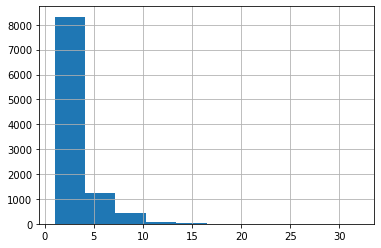

In [77]:
def find_inconsistencies_age_gap(row):
    if len(row.dropna().to_list()) !=0:
        return max(row.dropna().to_list())-min(row.dropna().to_list())
    return pd.NA
gap = had.loc[inconsistencies,age_menopause].apply(find_inconsistencies_age_gap, axis=1)
gap.hist()

<AxesSubplot:ylabel='Frequency'>

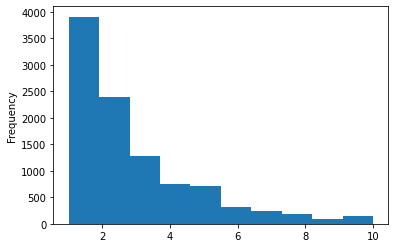

In [91]:
gap[gap<=10].plot.hist(bins=10)

In [92]:
gap.value_counts()

1.0     3905
2.0     2382
3.0     1283
4.0      753
5.0      704
6.0      317
7.0      236
8.0      179
10.0     147
9.0       97
11.0      48
12.0      23
15.0       9
14.0       9
13.0       8
16.0       4
18.0       4
19.0       2
23.0       1
17.0       1
21.0       1
32.0       1
25.0       1
dtype: int64

In [93]:
had.loc[inconsistencies,age_menopause][gap==25]

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
198335,45.0,20.0,45.0,NaN


In [94]:
had.loc[inconsistencies,age_menopause][gap==32]

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
162631,55.0,NaN,51.0,23.0


In [95]:
had.loc[inconsistencies,age_menopause][gap>=15]

,3581-0.0,3581-1.0,3581-2.0,3581-3.0
7346,37.0,NaN,52.0,NaN
8905,45.0,60.0,NaN,NaN
13962,40.0,NaN,49.0,56.0
31935,30.0,53.0,NaN,NaN
36200,60.0,45.0,NaN,NaN
61538,42.0,NaN,58.0,NaN
62030,40.0,NaN,55.0,NaN
88348,42.0,NaN,60.0,NaN
101998,55.0,NaN,40.0,NaN
105132,35.0,NaN,50.0,NaN


In [105]:
def find_age_menopause(row):
    if len(row.dropna().unique()) ==1:
            return row.dropna().unique()[0]
    return pd.NA
had["f3581"] = had[age_menopause].apply(find_age_menopause, axis=1)
had.loc[:,age_menopause+["f3581"]]

/tmp/2509530.1.high_mem.q/ipykernel_29193/1566245659.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  had["f3581"] = had[age_menopause].apply(find_age_menopause, axis=1)


,3581-0.0,3581-1.0,3581-2.0,3581-3.0,f3581
1,53.0,NaN,53.0,NaN,53.0
2,52.0,52.0,52.0,NaN,52.0
6,41.0,NaN,NaN,NaN,41.0
9,50.0,NaN,NaN,NaN,50.0
10,NaN,NaN,54.0,NaN,54.0
...,...,...,...,...,...
220379,51.0,NaN,NaN,NaN,51.0
220380,51.0,NaN,NaN,NaN,51.0
220381,48.0,NaN,NaN,NaN,48.0
220383,49.0,NaN,NaN,NaN,49.0


<AxesSubplot:>

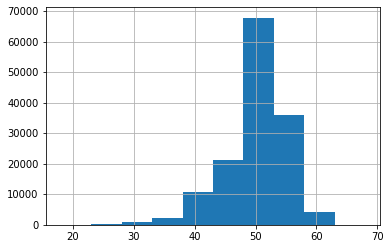

In [103]:
had["f3581"].hist()

In [107]:
had[had["f3581"]<50]["f3581"].value_counts(dropna=False)

48.0    9484
49.0    7904
45.0    7600
47.0    4908
46.0    4150
42.0    3486
40.0    3328
43.0    2347
44.0    2293
41.0    1502
39.0    1145
38.0    1124
35.0     572
36.0     556
37.0     507
32.0     339
34.0     338
30.0     218
33.0     212
29.0     188
31.0     160
28.0     100
27.0      77
26.0      60
25.0      47
23.0      32
20.0      22
24.0      21
21.0      20
22.0      15
18.0      10
19.0       8
Name: f3581, dtype: int64

In [108]:
## ever_HRT
filtered[ever_HRT]

,2814-0.0,2814-1.0,2814-2.0,2814-3.0
0,0.0,NaN,NaN,NaN
1,1.0,NaN,1.0,NaN
2,0.0,0.0,0.0,NaN
3,1.0,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN
...,...,...,...,...
220383,0.0,NaN,NaN,NaN
220384,0.0,NaN,NaN,NaN
220385,0.0,0.0,NaN,NaN
220386,0.0,NaN,NaN,NaN


Data-Coding 100349 according to https://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=2814
```
1	Yes
0	No
-1	Do not know
-3	Prefer not to answer
```

In [109]:
def find_exclusion_ever_HRT(row):
    if len(row.dropna().to_list()) ==0:
        return True
    if (-1 in row.to_list()) or (-3 in row.to_list()):
        return True
    return False
exclusion = filtered[ever_HRT].apply(find_exclusion_ever_HRT, axis=1)
filtered = filtered[~exclusion]
filtered.shape

(219647, 771)

In [115]:
def find_inconsistencies_ever_HRT(row):
    if len(row.dropna().unique()) >1:
        return True
    return False
inconsistencies = filtered[ever_HRT].apply(find_inconsistencies_ever_HRT, axis=1)
filtered.loc[inconsistencies,ever_HRT]

,2814-0.0,2814-1.0,2814-2.0,2814-3.0
254,0.0,NaN,1.0,NaN
375,0.0,NaN,1.0,NaN
474,0.0,1.0,1.0,NaN
487,0.0,NaN,1.0,NaN
648,0.0,1.0,NaN,NaN
...,...,...,...,...
219489,0.0,NaN,1.0,NaN
219546,1.0,NaN,0.0,0.0
219838,0.0,0.0,1.0,NaN
220261,1.0,0.0,1.0,NaN


In [116]:
filtered = filtered[~inconsistencies]
filtered.shape

(217650, 772)

In [117]:
def find_ever_HRT(row):
    if len(row.dropna().unique()) ==1:
        return row.dropna().to_list()[-1]
    return pd.NA
filtered["2814"] = filtered[ever_HRT].apply(find_ever_HRT, axis=1)
filtered["2814"].value_counts(dropna=False)

0.0    141412
1.0     76238
Name: 2814, dtype: int64

In [118]:
## age_started_HRT
filtered[age_started_HRT]

,3536-0.0,3536-1.0,3536-2.0,3536-3.0
0,NaN,NaN,NaN,NaN
1,54.0,NaN,54.0,NaN
2,NaN,NaN,NaN,NaN
3,-1.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
220383,NaN,NaN,NaN,NaN
220384,NaN,NaN,NaN,NaN
220385,NaN,NaN,NaN,NaN
220386,NaN,NaN,NaN,NaN


Coding 100291 defines 2 special values:
```
-1 represents "Do not know"
-3 represents "Prefer not to answer"
```

In [119]:
ever_HRT = filtered[filtered["2814"] ==1]
def find_exclusion_age_started_HRT(row):
    if len(row.dropna().to_list()) ==0:
        return True
    if (-1 in row.to_list()) or (-3 in row.to_list()):
        return True
    return False
exclusion = ever_HRT[age_started_HRT].apply(find_exclusion_age_started_HRT, axis=1)
ever_HRT = ever_HRT[~exclusion]
ever_HRT.shape

(67376, 772)

In [120]:
def find_inconsistencies_age_started_HRT(row):
    if len(row.dropna().unique()) >1:
        return True
    return False
inconsistencies = ever_HRT[age_started_HRT].apply(find_inconsistencies_age_started_HRT, axis=1)
ever_HRT.loc[inconsistencies,age_started_HRT]

,3536-0.0,3536-1.0,3536-2.0,3536-3.0
50,48.0,45.0,NaN,NaN
64,53.0,52.0,NaN,NaN
90,52.0,52.0,54.0,NaN
179,50.0,46.0,52.0,42.0
279,50.0,NaN,51.0,NaN
...,...,...,...,...
220048,56.0,NaN,59.0,NaN
220089,50.0,NaN,48.0,NaN
220148,53.0,54.0,NaN,NaN
220218,46.0,NaN,58.0,NaN


<AxesSubplot:>

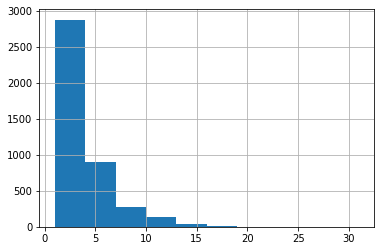

In [121]:
def find_inconsistencies_age_gap(row):
    if len(row.dropna().to_list()) !=0:
        return max(row.dropna().to_list())-min(row.dropna().to_list())
    return pd.NA
gap = ever_HRT.loc[inconsistencies,age_started_HRT].apply(find_inconsistencies_age_gap, axis=1)
gap.hist()

<AxesSubplot:ylabel='Frequency'>

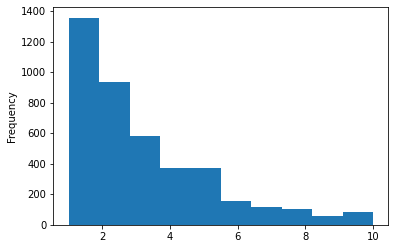

In [122]:
gap[gap<=10].plot.hist(bins=10)

Tolerate maximum 3 year gap. For those have gaps in age, take the average between the max and min

<AxesSubplot:>

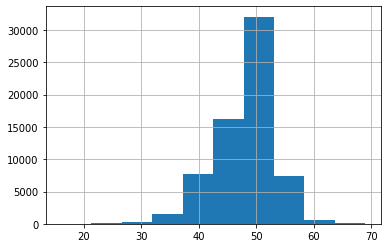

In [129]:
def find_age_started_HRT(row):
    if len(row.dropna().unique()) ==1:
        return row.dropna().unique()[0]
    elif len(row.dropna().unique()) >1:
        if (max(row.dropna().to_list())-min(row.dropna().to_list()))<=3:
            return (max(row.dropna().to_list())+min(row.dropna().to_list()))/2
    return pd.NA
ever_HRT["3536"] = ever_HRT[age_started_HRT].apply(find_age_started_HRT, axis=1)
ever_HRT["3536"].hist()

In [130]:
## age_last_HRT
filtered[age_last_HRT]

,3546-0.0,3546-1.0,3546-2.0,3546-3.0
0,NaN,NaN,NaN,NaN
1,60.0,NaN,56.0,NaN
2,NaN,NaN,NaN,NaN
3,51.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
220383,NaN,NaN,NaN,NaN
220384,NaN,NaN,NaN,NaN
220385,NaN,NaN,NaN,NaN
220386,NaN,NaN,NaN,NaN


Coding 100598 defines 3 special values:
```
-1 represents "Do not know"
-11 represents "Still taking HRT"
-3 represents "Prefer not to answer"
```

In [133]:
def find_exclusion_age_last_HRT(row):
    if len(row.dropna().to_list()) ==0:
        return True
    if (-1 in row.to_list()) or (-3 in row.to_list()) or (-11 in row.to_list()):
        return True
    return False
exclusion = ever_HRT[age_last_HRT].apply(find_exclusion_age_last_HRT, axis=1)
ever_HRT = ever_HRT[~exclusion]
ever_HRT.shape

(58233, 772)

In [134]:
def find_inconsistencies_age_last_HRT(row):
    if len(row.dropna().unique()) >1:
        return True
    return False
inconsistencies = ever_HRT[age_last_HRT].apply(find_inconsistencies_age_last_HRT, axis=1)
ever_HRT.loc[inconsistencies,age_last_HRT]

,3546-0.0,3546-1.0,3546-2.0,3546-3.0
1,60.0,NaN,56.0,NaN
50,58.0,55.0,NaN,NaN
64,55.0,54.0,NaN,NaN
90,54.0,53.0,57.0,NaN
118,45.0,46.0,NaN,NaN
...,...,...,...,...
220022,44.0,NaN,41.0,NaN
220148,63.0,60.0,NaN,NaN
220218,48.0,NaN,58.0,NaN
220236,58.0,NaN,52.0,NaN


<AxesSubplot:>

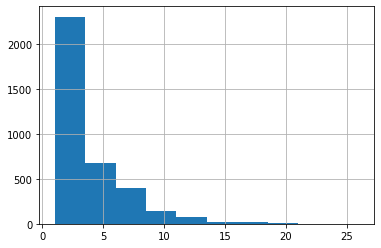

In [135]:
def find_inconsistencies_age_gap(row):
    if len(row.dropna().to_list()) !=0:
        return max(row.dropna().to_list())-min(row.dropna().to_list())
    return pd.NA
gap = ever_HRT.loc[inconsistencies,age_last_HRT].apply(find_inconsistencies_age_gap, axis=1)
gap.hist()

<AxesSubplot:ylabel='Frequency'>

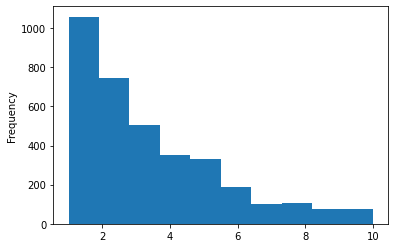

In [136]:
gap[gap<=10].plot.hist(bins=10)

In [ ]:
Tolerate maximum 3 year gap. For those have gaps in age, take the average between the max and min

<AxesSubplot:>

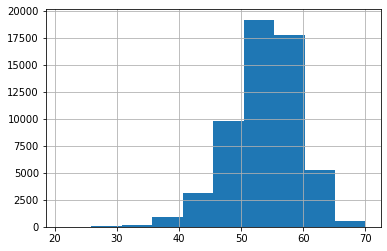

In [137]:
def find_age_last_HRT(row):
    if len(row.dropna().unique()) ==1:
        return row.dropna().unique()[0]
    elif len(row.dropna().unique()) >1:
        if (max(row.dropna().to_list())-min(row.dropna().to_list()))<=3:
            return (max(row.dropna().to_list())+min(row.dropna().to_list()))/2
    return pd.NA
ever_HRT["3546"] = ever_HRT[age_last_HRT].apply(find_age_last_HRT, axis=1)
ever_HRT["3546"].hist()

In [143]:
# Male 
filtered = filtered[filtered["sex"]=="1"]
filtered

,eid,31-0.0,34-0.0,52-0.0,2247-0.0,2247-1.0,2247-2.0,2247-3.0,2257-0.0,2257-1.0,...,41281-0.45,41281-0.46,131258-0.0,131778-0.0,131779-0.0,131780-0.0,131781-0.0,131784-0.0,131785-0.0,sex
1,1000022,1,1954,8,1,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
2,1000035,1,1944,5,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
5,1000063,1,1967,4,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
7,1000081,1,1942,2,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
10,1000112,1,1949,6,-1,<NA>,1,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502449,6025335,1,1946,6,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
502452,6025363,1,1944,4,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
502453,6025378,1,1966,10,0,<NA>,<NA>,<NA>,1,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
502454,6025381,1,1968,1,0,<NA>,<NA>,<NA>,0,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1


In [146]:
filtered.to_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/500k.male.223312ind.phe.csv",index=False)

In [147]:
filtered = pd.read_csv("~/UKBiobank/results/REGENIE_results/results_exome_data/051722_interaction_sex/sex_related/500k.male.223312ind.phe.csv",header=0)
filtered.shape

/tmp/2509530.1.high_mem.q/ipykernel_29193/3049730060.py:1: DtypeWarning: Columns (270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,56

(223312, 770)

In [148]:
## balding
filtered[balding_pattern]

,2395-0.0,2395-1.0,2395-2.0,2395-3.0
0,2.0,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN
4,2.0,NaN,-1.0,NaN
...,...,...,...,...
223307,3.0,NaN,NaN,NaN
223308,4.0,NaN,NaN,NaN
223309,2.0,NaN,NaN,NaN
223310,1.0,NaN,NaN,NaN


Coding

https://biobank.ndph.ox.ac.uk/showcase/coding.cgi?id=100572

https://biobank.ndph.ox.ac.uk/showcase/refer.cgi?id=100423

```
1	Pattern 1
2	Pattern 2
3	Pattern 3
4	Pattern 4
-1	Do not know
-3	Prefer not to answer
```

In [149]:
def find_exclusion_balding_pattern(row):
    if len(row.dropna().to_list()) ==0:
        return True
    if (-1 in row.to_list()) or (-3 in row.to_list()):
        return True
    return False
exclusion = filtered[balding_pattern].apply(find_exclusion_balding_pattern, axis=1)
filtered = filtered[~exclusion]
filtered.shape

(220843, 770)

In [150]:
def find_inconsistencies_balding_pattern(row):
    ans = [i for i in row if (not pd.isna(i)) and (i in [1,2,3,4])] 
    return sorted(ans) != ans
inconsistencies = filtered[balding_pattern].apply(find_inconsistencies_balding_pattern, axis=1)
filtered.loc[inconsistencies,balding_pattern]

,2395-0.0,2395-1.0,2395-2.0,2395-3.0
152,3.0,NaN,2.0,NaN
242,2.0,NaN,1.0,NaN
330,2.0,1.0,1.0,NaN
620,2.0,1.0,NaN,NaN
733,2.0,NaN,1.0,NaN
...,...,...,...,...
223114,2.0,NaN,1.0,NaN
223208,1.0,2.0,1.0,NaN
223211,3.0,NaN,2.0,NaN
223213,4.0,NaN,2.0,NaN


Balding can be weakened or be worse. It seems changing patterns is acceptable. Take the answer from the last visit?

In [151]:
def find_balding_pattern(row):
    return row.dropna().unique()[-1]
filtered["2395"] = filtered[balding_pattern].apply(find_balding_pattern, axis=1)
filtered["2395"].value_counts(dropna=False)

1.0    70595
3.0    59011
2.0    49290
4.0    41947
Name: 2395, dtype: int64